# Size decrease in female and male Chinook salmon
## Group 4:
Cheuk-lun Cheung, Diana Gawol, Allan Hu, Xinyi Wang,

# Introduction
Research has demonstrated that all Pacific salmon species have declined in size over the past century (Oke et al., 2020). Larger female fish have a greater fecundity (number of eggs per female) as well as larger eggs. Larger eggs are positively correlated with greater chance of juvenile survival; a greater number of eggs produce greater numbers of juveniles (Dickerson et al., 2002). Size of males, on the other hand, does not determine how many eggs they are able to fertilize. **With this in mind, we aim to investigate whether the observed overall decline in size is driven by differential change in size in female or male Chinook salmon (Onchorynchus tshawytscha).** For this, we will compare the differences in `median` length of female and male Chinook salmon between the 1960s and 2010s. **We hypothesize that the males’ difference in medians will be greater than the females’**. To investigate this question, we examine the dataset of Pacific salmon catch data from Alaska used by Oke et al. to demonstrate the overall size decrease over the last century. 

Biologically, the `median` location parameter is most suitable as it best represents the middle of the data. A ‘middle’ fish size is more useful than an ‘average’ fish size since outliers have less influence on it.

We use the `interquartile range` because the use of standard deviation is not appropriate with non-normal data. Furthermore, a central tendency is also not present as our data is not strictly ‘normal’ due to the presence of outliers.



# Preliminary results

In [2]:
library(cowplot)
library(infer)
library(repr)
library(tidyverse)
library(broom)
library(digest)

In [6]:
## This is the link for the original data. We ran into big issues becuase the file is so large (>3GB). 
## Therefore, we had to do one filtering step for only data from Chinook in R outside of Jupyter. 
## We then uploaded that file (chinook.csv) to github to access for this script.

## This is the original data from the web and a few steps of filtering that we performed
# master <- read_csv("https://knb.ecoinformatics.org/knb/d1/mn/v2/object/urn%3Auuid%3A478e0569-a61b-4339-86d7-7ab3849dc8d4")

## Look at head
#head(master)

## Look at column names to select the ones of interest.
#colnames(master)

## Look at the different types of fishing used 
#levels(as.factor(master$ASLProjectType))



## Filter data for species and columns of interest
#chinook <- master %>%
#  filter(Species == "chinook") %>%
#  select(Species, Length, Weight, Sex, sampleYear, ASLProjectType, Length.Measurement.Type) %>%
#  na.omit(Species, Length, Weight, Sex, sampleYear, ASLProjectType, Length.Measurement.Type) 

## This is the point at which we downloaded chinook.csv from R and placed it to github.
## It can be accessed here
chinook <- read_csv("https://raw.githubusercontent.com/GChroma/Stat201-group-project-4/main/data/chinook.csv")
head(chinook)

Rows: 73226 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Species, Sex, ASLProjectType, Length.Measurement.Type
dbl (3): Length, Weight, sampleYear

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Species,Length,Weight,Sex,sampleYear,ASLProjectType,Length.Measurement.Type
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chinook,1070,498,male,1968,commercial catch,mid-eye to fork of tail
chinook,890,320,female,1968,commercial catch,mid-eye to fork of tail
chinook,888,440,female,1968,commercial catch,mid-eye to fork of tail
chinook,955,330,female,1968,commercial catch,mid-eye to fork of tail
chinook,870,250,male,1968,commercial catch,mid-eye to fork of tail
chinook,887,270,female,1968,commercial catch,mid-eye to fork of tail


In [11]:
## Look at the different sexes assigned
levels(as.factor(chinook$Sex))


## Remove all unknown sex 
chinook_sex_known <- chinook %>%
  filter(!(Sex %in% c("unknown", "examined but did not identify"))) 

head(chinook_sex_known)

[1] "examined but did not identify" "female"                       
[3] "male"                          "unknown"

Species,Length,Weight,Sex,sampleYear,ASLProjectType,Length.Measurement.Type
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chinook,1070,498,male,1968,commercial catch,mid-eye to fork of tail
chinook,890,320,female,1968,commercial catch,mid-eye to fork of tail
chinook,888,440,female,1968,commercial catch,mid-eye to fork of tail
chinook,955,330,female,1968,commercial catch,mid-eye to fork of tail
chinook,870,250,male,1968,commercial catch,mid-eye to fork of tail
chinook,887,270,female,1968,commercial catch,mid-eye to fork of tail


In [12]:
## Look at levels of fishing methods
levels(as.factor(chinook$ASLProjectType))

[1] "commercial catch"  "escapement"        "sport catch"      
[4] "subsistence catch" "test fishing"

In [13]:
## Filter for subsistence fishing and use of consistent method for length measurements
chinook_subsistence <- chinook_sex_known %>%
  filter(ASLProjectType == "subsistence catch",
         Length.Measurement.Type == "mid-eye to fork of tail")

head(chinook_subsistence)

Species,Length,Weight,Sex,sampleYear,ASLProjectType,Length.Measurement.Type
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chinook,710,13.50,male,2010,subsistence catch,mid-eye to fork of tail
chinook,850,18.90,female,2010,subsistence catch,mid-eye to fork of tail
chinook,910,25.35,female,2010,subsistence catch,mid-eye to fork of tail
chinook,770,15.95,male,2010,subsistence catch,mid-eye to fork of tail
chinook,800,17.00,female,2010,subsistence catch,mid-eye to fork of tail
chinook,780,17.45,male,2010,subsistence catch,mid-eye to fork of tail


In [14]:
## Look which years are represented after all that filtering
levels(as.factor(chinook_subsistence$sampleYear))

[1] "1964" "1968" "1970" "1977" "1979" "1982" "2005" "2006" "2008" "2009"
[11] "2010" "2011" "2012"

In [15]:
## Create column to assign decades
chinook_subsistence <- chinook_subsistence %>%
  mutate(sampleDecade = ifelse(sampleYear %in% 1960:1969, "1960s",
                                 ifelse(sampleYear %in% 1970:1979, "1970s", 
                                        ifelse(sampleYear %in% 1980:1989, "1980s",
                                               ifelse(sampleYear %in% 2000:2009, "2000s",
                                                      ifelse(sampleYear %in% 2010:2019, "2010s", "unassigned"))))))
head(chinook_subsistence)

Species,Length,Weight,Sex,sampleYear,ASLProjectType,Length.Measurement.Type,sampleDecade
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chinook,710,13.50,male,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,850,18.90,female,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,910,25.35,female,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,770,15.95,male,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,800,17.00,female,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,780,17.45,male,2010,subsistence catch,mid-eye to fork of tail,2010s


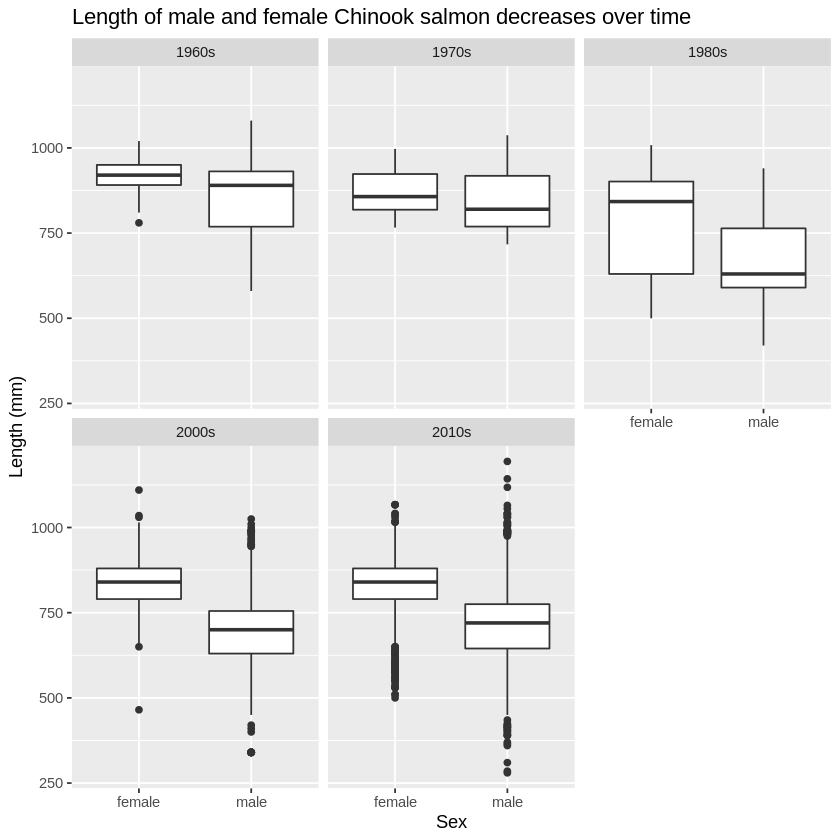

In [16]:
## Overview plot of length of females and males throughout the decades
plot_overview <- chinook_subsistence %>%
  ggplot(aes(Length, Sex)) +
  geom_boxplot() +
  facet_wrap(~ sampleDecade) +
  coord_flip() +
  ggtitle(("Length of female and male Chinook salmon decreases over time")) +
  xlab("Length (mm)")
plot_overview

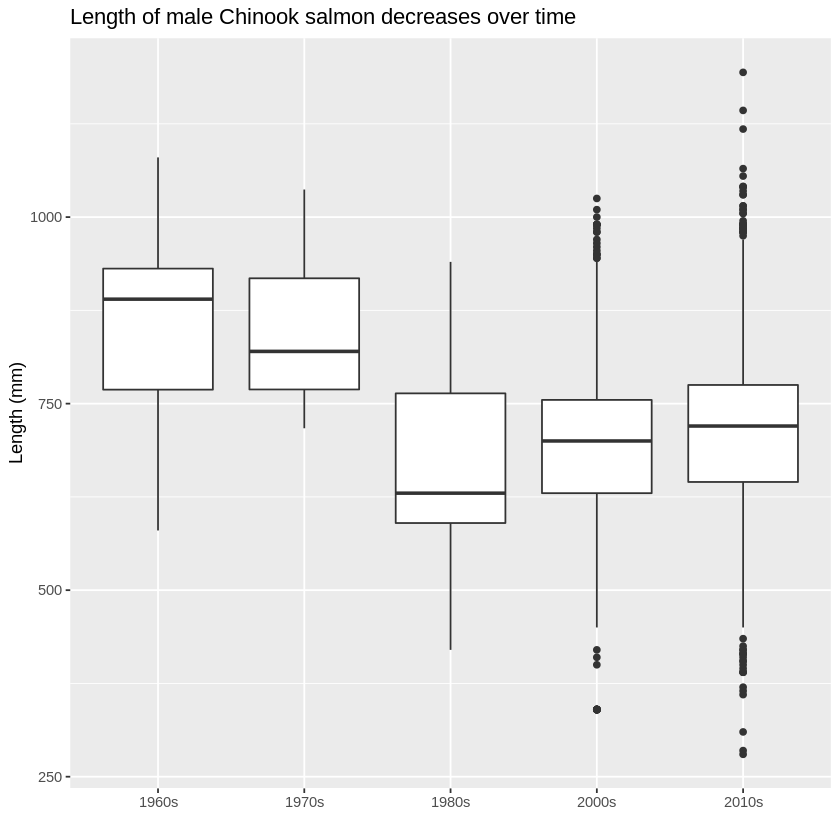

In [17]:
## Overview plot of length of males throughout the decades
plot_male <- chinook_subsistence %>%
  filter(Sex == "male") %>%
  ggplot(aes(Length, sampleDecade)) +
  geom_boxplot() +
  coord_flip() +
  ggtitle(("Length of male Chinook salmon decreases over time")) +
  xlab("Length (mm)") +
  ylab("")
plot_male

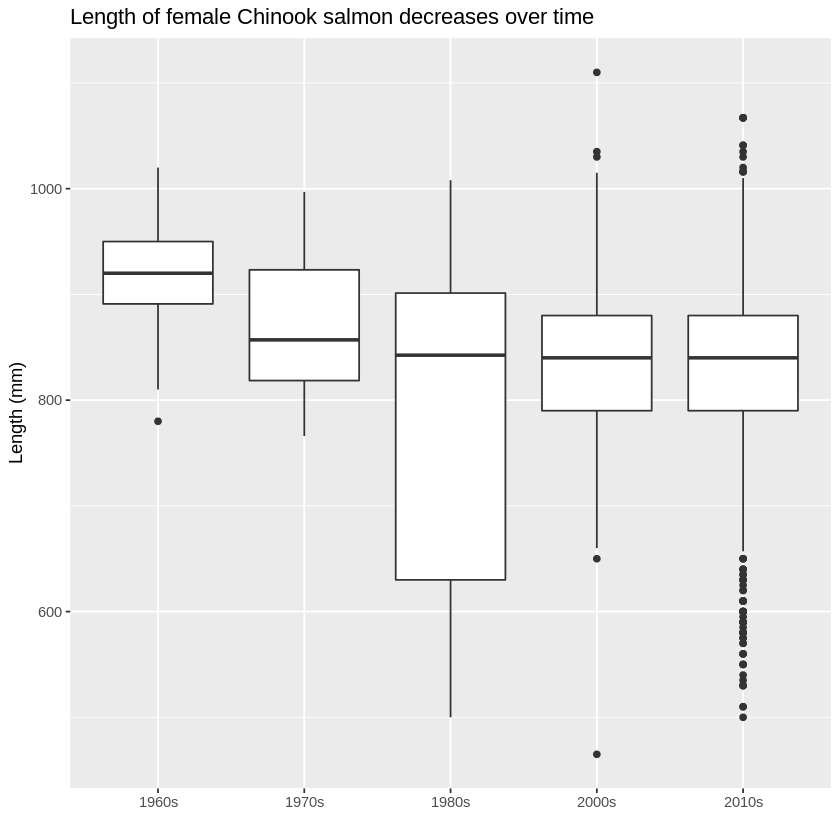

In [18]:
## Overview plot of length of females throughout the decades
plot_female <- chinook_subsistence %>%
  filter(Sex == "female") %>%
  ggplot(aes(Length, sampleDecade)) +
  geom_boxplot() +
  coord_flip() +
  ggtitle(("Length of female Chinook salmon decreases over time")) +
  xlab("Length (mm)") +
  ylab("")
plot_female

In [20]:
## Drop the decades we will not use
chinook_1960_2010 <- chinook_subsistence %>%
    filter(sampleDecade %in% c("1960s","2010s"))

head(chinook_1960_2010)

Species,Length,Weight,Sex,sampleYear,ASLProjectType,Length.Measurement.Type,sampleDecade
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chinook,710,13.50,male,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,850,18.90,female,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,910,25.35,female,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,770,15.95,male,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,800,17.00,female,2010,subsistence catch,mid-eye to fork of tail,2010s
chinook,780,17.45,male,2010,subsistence catch,mid-eye to fork of tail,2010s


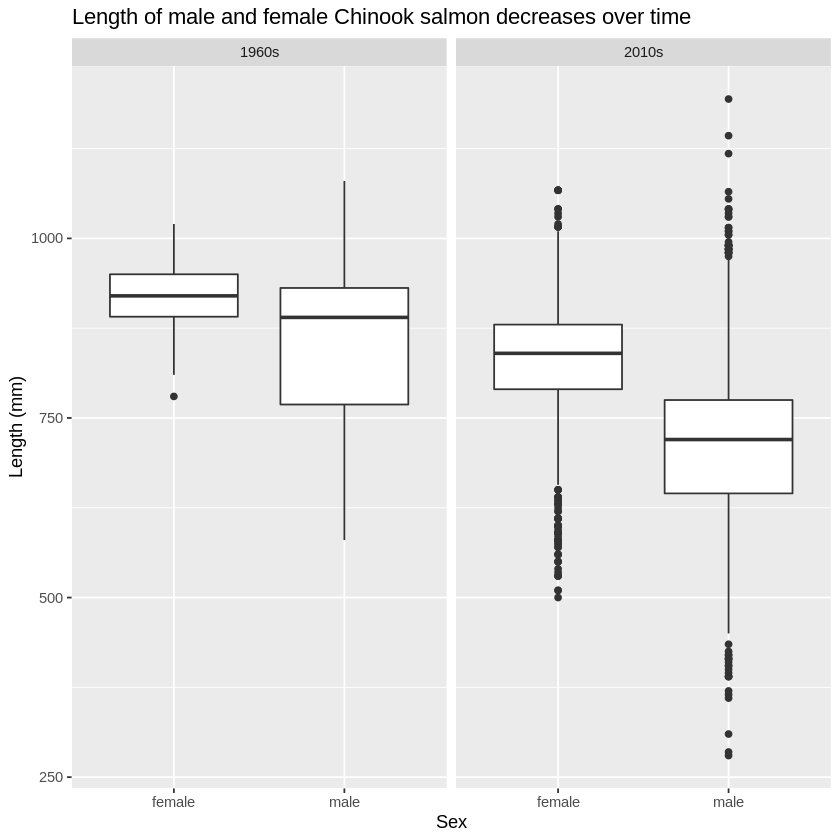

In [26]:
## Overview plot of length of females and males of just the decades we will use
plot_overview <- chinook_1960_2010 %>%
  ggplot(aes(Length, Sex)) +
  geom_boxplot() +
  facet_wrap(~ sampleDecade) +
  coord_flip() +
  ggtitle(("Length of female and male Chinook salmon decreases over time")) +
  xlab("Length (mm)")
plot_overview

In [21]:
## Summary of the data. We also included mean and SD just for comparison to the median. 
chinook_summary <-
     chinook_1960_2010 %>% 
     group_by(sampleDecade, Sex) %>% 
     summarise(n = n(),
               mean = mean(Length),
               sd = sd(Length),
               median = median(Length),
               IQR = IQR(Length),
               `.groups` = "drop") %>% 
     pivot_wider(names_from = Sex, values_from = c(n, mean, sd, median, IQR)) 

chinook_summary

sampleDecade,n_female,n_male,mean_female,mean_male,sd_female,sd_male,median_female,median_male,IQR_female,IQR_male
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1960s,41,56,918.2439,853.3393,53.42835,115.6607,920,890,59,162.25
2010s,1750,4752,829.0823,711.2652,77.02088,104.5673,840,720,90,130.00


# Methods
This report has reliability due to filtering out confounding variables, however it is not discernable whether the differences in size decrease we are seeing are statistically significant from our plots. Thus, we will perform the following analysis.

For each sex, we will first confirm that fish from the 1960s are longer than fish from the 2010s:
For this, the **null hypothesis** is that there is no difference in the difference of medians from 1960s to 2010s in female and male fish. 
The **alternative hypothesis** is that 1960s fish are significantly longer than the 2010s fish. This is a one-sided test via simulation of the null-distribution.
$$
\begin{align*}
H_0&: \mu_{\text{1960s}} - \mu_{\text{2010s}} = 0 \\ 
H_1&: \mu_{\text{1960s}} - \mu_{\text{2010s}} < 0 \\ 
\end{align*}
$$

We will then calculate the p-value with a significance level set to $\alpha$ = 0.05 and the confidence interval (1-$\alpha$) in order to reject the null hypothesis or not. Finally, we will compare the p-values between the two sexes to infer the likelihood that females have decreased less in size than males. We are hoping to learn alternative tools for this comparison in the upcoming weeks of the course.
$$
\begin{align*}
H_0&: p_{\text{female}} = p_{\text{male}}\\ 
H_1&: p_{\text{female}} > p_{\text{male}} \\ 
\end{align*}
$$

We expect that male fish experienced a greater decrease in size relative to the females, as mentioned in the introduction. These findings will offer important insights into sex-based trends in fish size decreases.


Further questions:
1. How much of an effect do selective pressures play in the difference in size decrease between female and male fish?
2. What is the relationship between size and survival in male fish given no expected correlation from this data?
3. Looking at these trends, what will be the minimum size salmon will reach?


# References
Dickerson, B. R., Quinn, T. P., & Willson, M. F. (2002). Body size, arrival date, and reproductive success of pink salmon, Oncorhynchus gorbuscha. Ethology Ecology & Evolution, 14(1), 29–44. doi:10.1080/08927014.2002.9522759

Malick, M. J., Losee, J. P., Marston, G., Agha, M., Berejikian, B. A., Beckman, B. R., & Cooper, M. (n.d.). Fecundity trends of Chinook salmon in the Pacific Northwest. Fish and Fisheries, n/a(n/a). https://doi.org/10.1111/faf.12738

Oke, K.B., Cunningham, C.J., Westley, P.A.H., Baskett, M.L., Carlson, S.M., Clark, J., Hendry, A.P., Karatayev, V.A., Kendall, N.W., Kibele, J., Kindsvater, H.K., Kobayashi, K.M., Lewis, B., Munch, S., Reynolds, J.D., Vick, G.K., Palkovacs, E.P. (2020). Recent declines in salmon body size impact ecosystems and fisheries. Nature Communications, 11(1), 4155. doi:10.1038/s41467-020-17726-z

